
# Face Mask Detection

## Overview
This project leverages deep learning techniques to classify images of people wearing face masks and those not wearing face masks using a Convolutional Neural Network (CNN) architecture. The CNN model is built using TensorFlow and Keras, and it is trained using a dataset of face mask images. The goal is to detect face masks in real-time using a webcam.

## Requirements

To run the project, you need the following Python libraries:

- TensorFlow
- Keras
- OpenCV
- Scikit-learn
- Matplotlib
- Imutils
- Numpy
- OS

You can install the required libraries using the following pip command:

```bash
pip install tensorflow opencv-python imutils scikit-learn matplotlib numpy
```

## Project Description

This Jupyter Notebook is composed of three main parts:

### 1. **Importing Necessary Libraries**
In this section, the required packages for data processing, model construction, and evaluation are imported. These include:

- `TensorFlow` for building and training the CNN model.
- `OpenCV` for real-time video capture and image processing.
- `Imutils` for video stream handling.
- `Scikit-learn` for data preprocessing and evaluation.
- `Matplotlib` for visualizations.

These libraries will be used in the subsequent steps to handle the image dataset, build the model, and perform real-time face mask detection.


In [2]:
# type: ignore
# Import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import os
from imutils.video import VideoStream
import imutils
import time
import cv2


# Face Mask Detection

This section covers the data preparation, model training, and evaluation process:

### 1. **Data Preparation and Model Training**
In this section, the following steps are performed:

- **Data Loading**: The dataset, which consists of images categorized into two classes (`with_mask`, `without_mask`), is loaded. The images are resized to 224x224 pixels and preprocessed using the `MobileNetV2` preprocessing function.
- **Label Encoding**: Labels are converted into binary format using one-hot encoding and transformed using `LabelBinarizer`.
- **Data Augmentation**: To increase the robustness of the model, data augmentation is applied to the training images, including rotation, zoom, and shift operations.
- **Model Construction**: A MobileNetV2 model, pre-trained on ImageNet, is used as the base model. Additional layers are added for classification purposes.
- **Model Training**: The model is trained using the Adam optimizer with a learning rate of `1e-4` for 20 epochs, with a batch size of 32.
- **Model Evaluation**: After training, the model is evaluated on the test data, and a classification report is generated showing the performance metrics (precision, recall, F1-score) for both classes.

### 2. **Model Saving and Visualization**
Once the model is trained, it is saved in the `.h5` format. Additionally, a plot of the training and validation loss and accuracy is displayed to visualize the model's performance over the epochs.


[INFO] loading images...
[INFO] Found path: D:/الكلية/CV/Face-Mask-Detection-master/dataset\with_mask
[INFO] Found path: D:/الكلية/CV/Face-Mask-Detection-master/dataset\without_mask


C:\Users\Options\AppData\Local\Temp\ipykernel_21332\854893074.py:56: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  baseModel = MobileNetV2(


[INFO] compiling model...
[INFO] training head...


c:\Users\Options\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


c:\Users\Options\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6757 - loss: 0.6386

c:\Users\Options\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(36, 224, 224, 3))
  warnings.warn(msg)


31/31 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.6788 - loss: 0.6336 - val_accuracy: 0.7937 - val_loss: 0.3340
Epoch 2/20
 1/31 ━━━━━━━━━━━━━━━━━━━━ 22s 746ms/step - accuracy: 0.7812 - loss: 0.4487

c:\Users\Options\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 225ms/step - accuracy: 0.7812 - loss: 0.4487 - val_accuracy: 0.7976 - val_loss: 0.3295
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.8809 - loss: 0.2884 - val_accuracy: 0.9246 - val_loss: 0.2085
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 211ms/step - accuracy: 1.0000 - loss: 0.1922 - val_accuracy: 0.9246 - val_loss: 0.2064
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.9541 - loss: 0.2006 - val_accuracy: 0.9643 - val_loss: 0.1437
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 223ms/step - accuracy: 1.0000 - loss: 0.0898 - val_accuracy: 0.9683 - val_loss: 0.1421
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.9837 - loss: 0.1184 - val_accuracy: 0.9563 - val_loss: 0.1172
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 211ms/step - accuracy: 1.0000 - loss: 0.1078 - val_accuracy: 0.9563 - val_loss: 0.1172
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.9849 - loss: 0.1007 - val_accuracy: 0.9802 - val_loss: 0.

c:\Users\Options\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)


8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step  


              precision    recall  f1-score   support

   with_mask       0.99      0.99      0.99       199
without_mask       0.98      0.94      0.96        53

    accuracy                           0.98       252
   macro avg       0.98      0.97      0.98       252
weighted avg       0.98      0.98      0.98       252

[INFO] saving mask detector model...


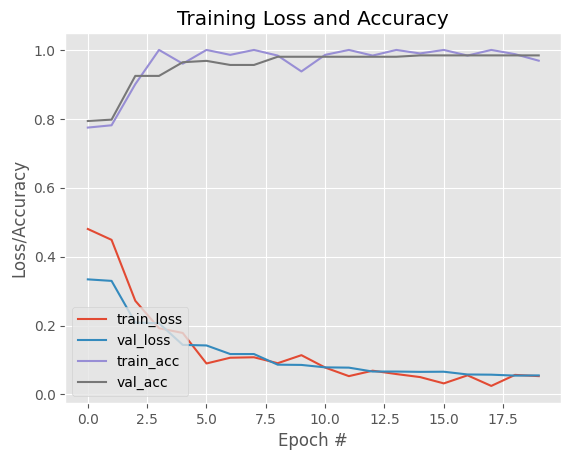

In [5]:
# Initialize the initial learning rate, number of epochs to train for, and batch size
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

# Path to the dataset and categories
DIRECTORY = "D:/الكلية/CV/Face-Mask-Detection-master/dataset"
CATEGORIES = ["with_mask", "without_mask"]

# Grab the list of images in our dataset directory
print("[INFO] loading images...")
data = []
labels = []

# Verify the existence of each category path
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    if not os.path.exists(path):
        print(f"[ERROR] Path does not exist: {path}")
    else:
        print(f"[INFO] Found path: {path}")
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        image = preprocess_input(image)

        data.append(image)
        labels.append(category)

# Perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

data = np.array(data, dtype="float32")
labels = np.array(labels)

# Split the data into training and testing sets
(trainX, testX, trainY, testY) = train_test_split(
    data, labels, test_size=0.20, stratify=labels, random_state=42
)

# Construct the training image generator for data augmentation
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest",
)

# Load the MobileNetV2 network, ensuring the head FC layers are left off
baseModel = MobileNetV2(
    weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3))
)

# Construct the head of the model that will be placed on top of the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

# Place the head FC model on top of the base model
model = Model(inputs=baseModel.input, outputs=headModel)

# Freeze the base model layers
for layer in baseModel.layers:
    layer.trainable = False

# Compile the model
print("[INFO] compiling model...")
opt = Adam(learning_rate=INIT_LR)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

# Train the head of the network
print("[INFO] training head...")
H = model.fit(
    aug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS,
)

# Make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

# For each image in the testing set, find the index of the label with the highest probability
predIdxs = np.argmax(predIdxs, axis=1)

# Show a classification report
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=lb.classes_))

# Save the trained model
print("[INFO] saving mask detector model...")
model.save("mask_detector.h5")  # Save in .h5 format

# Plot the training loss and accuracy
# Plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show() 

# Face Mask Detection

## Overview
This section of the project focuses on using a pre-trained face detector and mask detection model to detect faces and classify whether the person is wearing a mask or not in real-time video streams.

## Requirements

In addition to the libraries mentioned in the earlier sections, the following model files are required:

- **Face Detector Model**: The face detector is based on a deep learning model and is loaded using OpenCV's DNN module.
  - `deploy.prototxt`: Configuration file for the face detection model.
  - `res10_300x300_ssd_iter_140000.caffemodel`: Pre-trained weights for the face detector.
- **Mask Detector Model**: A pre-trained model saved as `mask_detector.h5` is used for mask prediction.

## Functionality

### 1. **Detect and Predict Mask Usage**
A function `detect_and_predict_mask` is defined to detect faces in a frame and predict whether the person is wearing a mask or not. It works as follows:

- **Face Detection**: The frame is passed through the face detection model to locate faces.
- **Face Preprocessing**: Each detected face is cropped, resized, and preprocessed to be fed into the mask detection model.
- **Prediction**: The mask detection model outputs the probability of the person wearing a mask or not.
- **Bounding Box and Labeling**: A bounding box is drawn around the detected face, and the prediction is displayed (either "Mask" or "No Mask") with confidence.

### 2. **Real-Time Video Stream**
The project uses OpenCV to start a video stream from the default camera and continuously captures frames to detect faces and predict mask usage in real-time. The following steps are executed:

- **Video Stream Initialization**: The webcam is initialized, and the stream is captured.
- **Face Mask Prediction**: The `detect_and_predict_mask` function is called on each frame.
- **Display Output**: The frames are displayed with bounding boxes drawn around faces and labels showing mask predictions.
- **Exit on 'q'**: The user can press the 'q' key to stop the video stream and exit.

## Conclusion
This section allows for real-time mask detection in a video stream, where the model continuously detects faces and classifies whether the detected person is wearing a mask or not.

In [3]:
# Function to detect faces and predict mask usage
def detect_and_predict_mask(frame, faceNet, maskNet):
    # Grab the dimensions of the frame and construct a blob
    (h, w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(frame, 1.0, (224, 224), (104.0, 177.0, 123.0))

    # Pass the blob through the network to obtain face detections
    faceNet.setInput(blob)
    detections = faceNet.forward()

    # Initialize lists of faces, their locations, and predictions
    faces = []
    locs = []
    preds = []

    # Loop over the detections
    for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]

        # Filter weak detections with confidence threshold
        if confidence > 0.5:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")

            # Ensure bounding boxes stay within frame dimensions
            (startX, startY) = (max(0, startX), max(0, startY))
            (endX, endY) = (min(w - 1, endX), min(h - 1, endY))

            # Extract face ROI, preprocess, and append to list
            face = frame[startY:endY, startX:endX]
            face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
            face = cv2.resize(face, (224, 224))
            face = img_to_array(face)
            face = preprocess_input(face)

            faces.append(face)
            locs.append((startX, startY, endX, endY))

    # Predict on all detected faces if any exist
    if len(faces) > 0:
        faces = np.array(faces, dtype="float32")
        preds = maskNet.predict(faces, batch_size=32)

    return (locs, preds)


# Load the face detector model
prototxtPath = r"face_detector\deploy.prototxt"
weightsPath = r"face_detector\res10_300x300_ssd_iter_140000.caffemodel"
faceNet = cv2.dnn.readNet(prototxtPath, weightsPath)

# Load the face mask detector model
maskNet = load_model("mask_detector.h5")

# Compile the model (although it's not strictly needed for inference)
maskNet.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Start the video stream
print("[INFO] starting video stream...")
vs = VideoStream(src=0).start()
time.sleep(2.0)

# Setup OpenCV window with modern look
cv2.namedWindow("Face Mask Detection", cv2.WINDOW_NORMAL)  # Modern resizable window
cv2.resizeWindow("Face Mask Detection", 800, 600)  # Set the initial window size
cv2.moveWindow("Face Mask Detection", 100, 100)  # Position the window on screen

# Loop over frames from the video stream
while True:
    # Read the frame from the video stream
    frame = vs.read()
    frame = imutils.resize(
        frame, width=800
    )  # Adjust frame width to match the window size

    # Detect faces and predict mask usage
    (locs, preds) = detect_and_predict_mask(frame, faceNet, maskNet)

    # Loop over detected faces and predictions
    for box, pred in zip(locs, preds):
        (startX, startY, endX, endY) = box
        (mask, withoutMask) = pred

        # Determine label and color for bounding box
        label = "Mask" if mask > withoutMask else "No Mask"
        color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

        # Display label and bounding box
        label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
        cv2.putText(
            frame,
            label,
            (startX, startY - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.6,
            color,
            2,
        )
        cv2.rectangle(frame, (startX, startY), (endX, endY), color, 2)

    # Show the output frame in a modernized window
    cv2.imshow("Face Mask Detection", frame)
    key = cv2.waitKey(1) & 0xFF

    # Exit the loop on 'q' key press
    if key == ord("q"):
        break

# Cleanup
cv2.destroyAllWindows()
vs.stop()
vs.stream.release()

[INFO] starting video stream...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━